# EXCERCISE WITH DATASET FROM SKLEARN

## IMPORT LIBRARY

In [70]:
from sklearn import datasets as datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay



## IMPORT DATASET

In [71]:
wine = datasets.load_wine()

numSamples, numFeatures = wine.data.shape

print(numSamples)
print(numFeatures)

178
13


## XGBOOST 

In [72]:
wine.data.shape

(178, 13)

In [73]:
print (wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [74]:
print(list(wine.target_names))

['class_0', 'class_1', 'class_2']


In [75]:
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

In [77]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [78]:
#tentukan hyperparametersnya
#kasus multipleclassifications ==> softmax
#lainnya : melalui percobaan

param = {
   'max_depth' :4,		          	#dalamnya tree
   'eta':0.3,			              	#learning rate
   'objective' : 'multi:softmax',	#dipakai untuk kasus multiple class
   'eval_metric':'mlogloss',
   'num_class':3}		            	#3 jenis target, sesuai jenis class, 0, 1, 2
epochs = 10  #jumlah iterasi 

In [79]:
#latih/train model dengan param ini sebagai awal percobaan

model = xgb.train(param, train, epochs)


In [80]:
#gunakan model yang telah dilatih untuk memprediksi dengan data test yang telah kita simpan (20%)

predictions = model.predict(test)
print(predictions)


[0. 2. 1. 0. 1. 0. 0. 2. 1. 1. 2. 2. 0. 1. 2. 1. 0. 0. 2. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 2. 0. 0. 1. 0. 0. 0.]


In [81]:
#cek akurasi hasil data test tadi.... membandingkan y_test (label sebenarnya) dengan hasil prediksi dengan model

accuracy_score(y_test, predictions)


0.9444444444444444

In [82]:
cm=confusion_matrix(y_test, predictions)
print(cm)

[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]


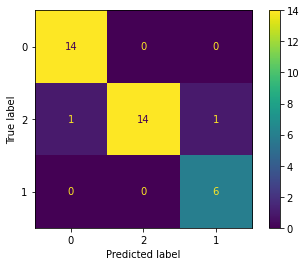

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
			       display_labels=y_test)
disp.plot()
plt.show()